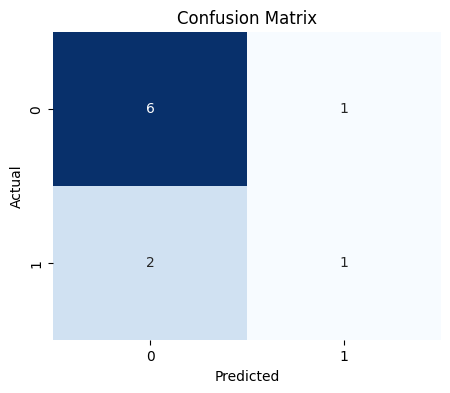

True Positives (TP)       = 1
True Negatives (TN)       = 6
False Positives (FP)      = 1
False Negatives (FN)      = 2
Accuracy                  = 0.70
Precision                 = 0.50
Recall                    = 0.33
F1 Score                  = 0.40
Negative Predictive Value (NPV) = 0.75
Specificity               = 0.86
F1 Score Class 0          = 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.50      0.33      0.40         3

    accuracy                           0.70        10
   macro avg       0.62      0.60      0.60        10
weighted avg       0.68      0.70      0.68        10



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan kita sudah memiliki y_test dan y_pred
y_test = [1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
y_pred = [0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()

# Metrics Calculation
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * ((precision * recall) / (precision + recall)) if (precision + recall) != 0 else 0
NPV = tn / (tn + fn) if (tn + fn) != 0 else 0  # Negative Predictive Value
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # True Negative Rate
F1_neg = 2 * ((NPV * specificity) / (NPV + specificity)) if (NPV + specificity) != 0 else 0

# Print Metrics
print("=" * 60)
print(f"{'True Positives (TP)':<25} = {tp}")
print(f"{'True Negatives (TN)':<25} = {tn}")
print(f"{'False Positives (FP)':<25} = {fp}")
print(f"{'False Negatives (FN)':<25} = {fn}")
print("=" * 60)
print(f"{'Accuracy':<25} = {accuracy:.2f}")
print(f"{'Precision':<25} = {precision:.2f}")
print(f"{'Recall':<25} = {recall:.2f}")
print(f"{'F1 Score':<25} = {f1_score:.2f}")
print(f"{'Negative Predictive Value (NPV)':<25} = {NPV:.2f}")
print(f"{'Specificity':<25} = {specificity:.2f}")
print(f"{'F1 Score Class 0':<25} = {F1_neg:.2f}")
print("=" * 60)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data menjadi train dan test
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Melatih model klasifikasi
model_class = LogisticRegression(max_iter=200)
model_class.fit(X_train_class, y_train_class)

# Prediksi
y_pred_class = model_class.predict(X_test_class)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

print("\nUsing K-Fold Cross Validation")

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
scores = cross_val_score(model_class, X, y, cv=kf)
print("Cross-Validation Scores:", [f"{score:.2f}" for score in scores])
print("Mean Score: %.2f" % scores.mean())

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Using K-Fold Cross Validation
Cross-Validation Scores: ['1.00', '1.00', '0.93', '0.97', '0.97']
Mean Score: 0.97
